In [197]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset
from torch import optim
import numpy as np

import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from single_output import SingleOutputEngine

In [198]:
np.random.seed(42)

true_b = 1
true_w = 2
N = 100
x = np.random.rand(100, 1)
epsilon = 0.1 * np.random.randn(100).reshape(-1, 1)
y = true_b + (x * true_w) + epsilon

In [199]:
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.3, random_state=42)
x_train.shape, x_val.shape, y_train.shape, x_val.shape

((70, 1), (30, 1), (70, 1), (30, 1))

In [200]:
normalizer = StandardScaler()
normalizer.fit(x_train)

x_train = normalizer.transform(x_train)
x_val = normalizer.transform(x_val)

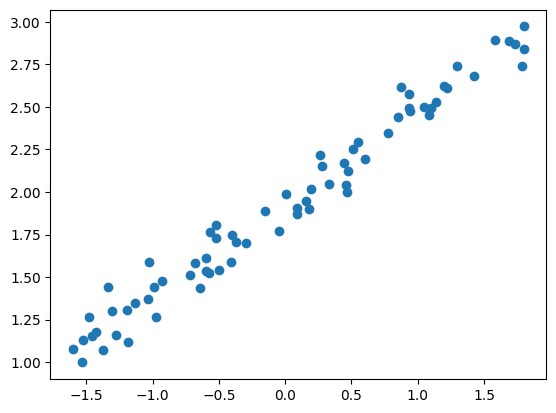

In [201]:
plt.scatter(x_train, y_train)

In [202]:
x_train_tensor = torch.as_tensor(x_train, dtype=torch.float)
x_val_tensor = torch.as_tensor(x_val, dtype=torch.float)

y_train_tensor = torch.as_tensor(y_train, dtype=torch.float)
y_val_tensor = torch.as_tensor(y_val, dtype=torch.float)

In [203]:
train_dateset = TensorDataset(x_train_tensor, y_train_tensor)
val_dataset = TensorDataset(x_val_tensor, y_val_tensor)

train_loader = DataLoader(
    dataset=train_dateset,
    shuffle=True,
    batch_size=16
)

val_loader = DataLoader(
    dataset=val_dataset,
    batch_size=16
)

In [204]:
torch.manual_seed(42)
model = nn.Sequential(nn.Linear(1, 1))

optimizer = optim.SGD(model.parameters(), lr=0.1)

loss_fn = nn.MSELoss()

In [205]:
trainer = SingleOutputEngine(model, optimizer, loss_fn)

trainer.set_loaders(train_loader, val_loader)

In [206]:
model.state_dict()

OrderedDict([('0.weight', tensor([[0.7645]])), ('0.bias', tensor([0.8300]))])

In [207]:
trainer.train(200)

In [208]:
model.state_dict()

OrderedDict([('0.weight', tensor([[0.5435]])), ('0.bias', tensor([1.9188]))])

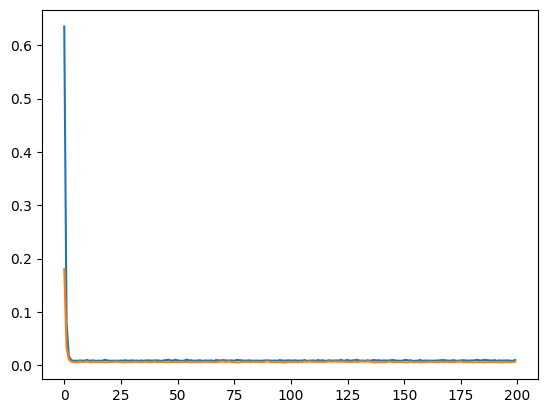

In [209]:
plt.plot(trainer.train_losses)
plt.plot(trainer.val_losses)